<a href="https://colab.research.google.com/github/HosseinEyvazi/NLP/blob/main/RAG_%26_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

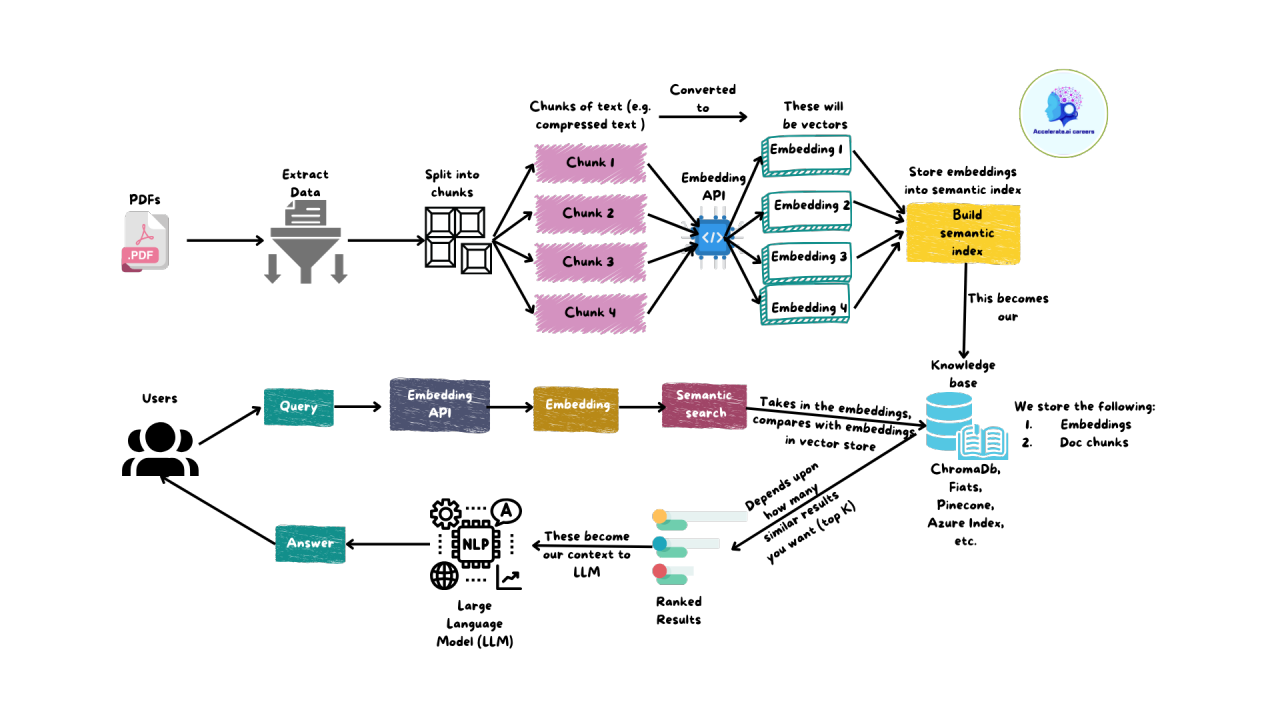

# RAG & AI Agents: Retrieval‑Augmented Generation for Intelligent Systems

---

## 1. Information Retrieval (IR)

**Information Retrieval** is the science of finding relevant pieces of text (documents, passages, webpages, etc.) in response to a user query. Classic IR techniques (keyword search, BM25, TF‑IDF) focus on matching terms; modern IR adds semantic similarity, dense embeddings, and learning‑to‑rank models.

---

## 2. Retrieval‑Augmented Generation (RAG)

**Definition** RAG couples *document retrieval* with *language‑model generation*. Instead of asking an LLM to "know everything," it is supplied with fresh, task‑specific evidence so its answers are:

* **Grounded** in the latest or proprietary data
* **More accurate** (fewer hallucinations)
* **Traceable** back to sources

**Key Components**

| Component           | Role                                                         |
| ------------------- | ------------------------------------------------------------ |
| **Vector store**    | Holds numerical embeddings of all knowledge‑base chunks      |
| **Embedding model** | Converts queries & chunks into dense vectors                 |
| **Retriever**       | Finds top‑k chunks by similarity (cosine, dot‑product)       |
| **Generator (LLM)** | Writes the final answer, conditioned on the retrieved chunks |

**High‑Level Workflow**

1. **Ingest & Chunk** docs → create embeddings → store vectors
2. **Query** from user/agent → embed → similarity search (retrieval)
3. Pass *query + top‑k chunks* to LLM → generate answer with citations

---

## 3. Three Phases of RAG

| Phase              | What Happens                                                                                       | Goal                                  |
| ------------------ | -------------------------------------------------------------------------------------------------- | ------------------------------------- |
| **1 Retrieval**    | Search the vector store for chunks semantically close to the query                                 | Collect relevant evidence             |
| **2 Augmentation** | Concatenate the *query* with the *retrieved chunks* (plus metadata such as titles or source links) | Provide the LLM with context it lacks |
| **3 Generation**   | The LLM reads the augmented prompt and produces an answer, optionally citing sources               | Deliver a fluent, informed response   |

> **Where is the “Augmented Generation”?**
> Phase 2 is the *augmentation* step (query + docs → prompt). Phase 3 is *generation*; together they create **retrieval‑augmented generation**.

---

## 4. Worked Example – Smart CRM Support Agent

**What is CRM?**
A *Customer Relationship Management (CRM)* system stores a company’s interactions, tickets, knowledge‑base articles, and customer profiles.

**Scenario**: A user asks, “How do I reset the admin password on the Apex X router?”

1. **Smart Retriever (AI Agent)** embeds the question.
2. **Lookup – Retrieval** (Phase 1) searches only the company’s *private* knowledge base, not the entire internet.
3. **Top‑k Docs** returned: KB‑123 (router manual excerpt), KB‑987 (password policy).
4. **Augmentation** (Phase 2): Build a prompt containing the question + both excerpts, each with titles and URLs.
5. **LLM Generator** (Phase 3) produces:
   *“To reset the Apex X admin password, press and hold the reset button for 10 s…*” plus citations to KB‑123 & KB‑987.

**Outcome**: The answer is accurate, source‑linked, and tailored to the customer.

---

## 5. Under‑the‑Hood Techniques

* **Embeddings** Dense vectors capturing meaning; similar meanings → nearby vectors.
* **Cosine similarity** Measures the cosine of the angle θ between two embedding vectors **u** and **v**:

  cos θ = (**u**·**v**) / (|**u**||**v**|)

  • **1** → identical direction (same meaning)
  • **0** → unrelated (orthogonal)
  • **‑1** → opposite meaning (very rare in natural‑language embeddings)

  Cosine scores let the retriever rank chunks whose semantics align most closely with the query.
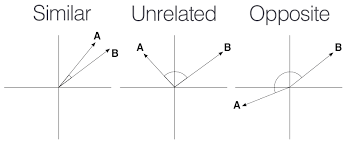


* **Semantic search** Ranking by meaning rather than exact words.
* **Chunking** *(very short)* → *Splitting long docs into smaller overlapping pieces so they fit an LLM context.*
* **Re‑ranking** Optional second pass to reorder retrieved chunks by relevance.
* **Source attribution** Include doc titles/URLs so answers can cite evidence.

---

## 6. Additional Application Examples

| Domain                   | RAG‑Powered Use Case                                          |
| ------------------------ | ------------------------------------------------------------- |
| **Enterprise search**    | Natural‑language queries across internal wikis, tickets, PDFs |
| **Legal research**       | Summarizing statutes & case law with citations                |
| **Healthcare**           | Clinical guideline lookup, patient Q\&A assistants            |
| **Education**            | Personal study helpers that reference course notes            |
| **Software engineering** | Code assistants grounded in a repo’s README & docs            |
| **Financial analysis**   | Generating reports from earnings calls & filings              |
| **E‑commerce**           | Conversational product advisors using catalog metadata        |

---

### Quick Recap

1. **IR** finds text; **RAG** augments LLMs with that text.
2. Three phases: *Retrieval → Augmentation → Generation*.
3. Embeddings + vector stores + cosine similarity make semantic retrieval fast.
4. Chunking keeps context within limits.

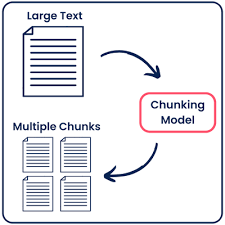


5. Applications span support chatbots, QA, research, and beyond.





## 🔧 Agents

Agents are intelligent orchestrators that dynamically select and execute the right tools or actions based on user inputs or tasks. They add a layer of flexibility and control in advanced AI systems, making them essential for real-world applications.

---

### 🔄 **Flexibility**

Agents integrate seamlessly with various external systems and tools, such as:

* Retrieval-Augmented Generation (RAG)
* Calculators
* APIs (e.g., weather, stock prices, internal databases)
* File systems
* Custom logic

✅ *Example:*
A user asks, *"What was Tesla’s stock price last Monday?"*
→ The agent uses a date parser, calls a finance API, then formats the answer.

---

### 🎯 **Function**

Agents **choose the appropriate tools** or chains to solve specific problems — often combining them in the right order.

✅ *Example:*
Query: *"Summarize this PDF and give me the average sentiment of its customer reviews."*
→ Agent:

1. Loads and parses the PDF.
2. Uses summarization.
3. Runs sentiment analysis on extracted sections.

---

### 🧠 **Purpose**

Agents enable **adaptability and context-awareness**, extending models beyond static behavior. They can:

* React to real-time data
* Make decisions about which action to take
* Escalate or delegate tasks

✅ *Example:*
For a travel assistant, an agent:

* Retrieves weather from an API
* Checks visa rules
* Books tickets using different APIs, depending on the user's country

---

### 💼 **Applications**

Agents are ideal for:

* **Complex Question Answering**
  (e.g., multi-hop or retrieval-based answers)
* **Multi-tool Assistance**
  (e.g., summarize + translate + email)
* **Process Automation**
  (e.g., generating reports, filling forms, updating CRM)
* **AI Companions**
  (e.g., that interact with calendars, messages, and APIs)

✅ *Example:*
*“Schedule a meeting with Sarah if we have less than 5 unresolved tickets.”*
→ Agent:

1. Calls CRM to check ticket count.
2. If condition met, books a meeting via Calendar API.

---

### ⚙️ **Dynamic Workflow**

Agents can **switch tools or strategies** on-the-fly based on the nature of the query — enabling them to handle unstructured, unexpected tasks.

✅ *Example:*
Query: *“Compare the revenue of OpenAI and Anthropic, and show a chart.”*
→ Agent:

* Performs web search or RAG retrieval.
* Extracts numbers.
* Uses a plotting tool to create a chart.



# Very Short Booklet: Using LangChain’s `create_dataframe_agent` for RAG

**RAG (Retrieval-Augmented Generation)** lets an LLM answer questions using external data (e.g., a DataFrame).

## Setup: Install packages

```bash
pip install langchain pandas openai
```

## Example: Query a DataFrame using LangChain’s `create_dataframe_agent`

```python
import pandas as pd
from langchain.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI

# Sample DataFrame
data = {
    "Country": ["USA", "Germany", "India"],
    "Capital": ["Washington, D.C.", "Berlin", "New Delhi"],
    "Population": [331, 83, 1380]  # in millions
}
df = pd.DataFrame(data)

# Initialize LLM (OpenAI API key set via environment variable or parameter)
llm = OpenAI(temperature=0)

# Create LangChain agent to interact with the DataFrame
agent = create_pandas_dataframe_agent(llm, df, verbose=True)

# Ask a question about the DataFrame
response = agent.run("What is the capital of Germany?")
print(response)
```

## Explanation

- `create_pandas_dataframe_agent` wraps an LLM and your DataFrame  
- You send natural language questions, and the agent **retrieves relevant info from the DataFrame**  
- Uses LLM + data retrieval = RAG pattern in a simple form

## Notes

- Replace `OpenAI` with any compatible LLM in LangChain.  
- Useful for building apps where LLMs answer questions grounded on tabular data.




## ✨ LangChain Platform

*A Swiss‑army‑knife toolkit for building LLM‑powered applications (Python & JS/TS).*

| Pillar               | What it is                                                           | Typical Classes / Helpers                                | One‑liner Use‑case                                                         |
| -------------------- | -------------------------------------------------------------------- | -------------------------------------------------------- | -------------------------------------------------------------------------- |
| **Agents**           | Event‑loop that picks *tools* and orchestrates them in real time.    | `AgentExecutor`, `Tool`, `create_openai_functions_agent` | “Calculate 2‑day weather forecast *and* draft an email with packing tips.” |
| **Chains**           | Deterministic pipelines (sequential / branching).                    | `LLMChain`, `RouterChain`, LCEL (`>>`)                   | Pass a prompt → translate → summarize → store.                             |
| **Document Loaders** | Uniform loaders for PDFs, web pages, SQL, email, etc.                | `UnstructuredPDFLoader`, `WebBaseLoader`, `S3FileLoader` | Slurp 10 K docs into memory in 3 lines.                                    |
| **Vector Stores**    | Plug‑and‑play DB wrappers around FAISS, Pinecone, Chroma, Weaviate … | `FAISS`, `Chroma`, `Pinecone`                            | Embed, store, & similarity‑search chunks for RAG.                          |
| **Prompt Templates** | Parameterized prompts with variables & Jinja‑style logic.            | `PromptTemplate`, `ChatPromptTemplate`                   | Re‑use one template for many user inputs.                                  |

> **Prompt Template = Prompt + Slots**
> Example – `“Answer as a {role} in under {words} words: {question}”`

---

### 🛠 Functionality Highlights

* **LCEL (LangChain Expression Language)** – declarative graph DSL:

  ```python
  chain = (prompt | llm | str)   # pipes!
  ```
* **Memory** – stick conversation or tool outputs into a buffer, summary, or knowledge graph.
* **Callbacks & Tracing** – real‑time inspection; send traces to **LangSmith** for dashboards.
* **RAG Helpers** – `RetrievalQA`, `ConversationalRetrievalChain`, `MultiVectorRetriever`.
* **Evaluation** – automatic rubric scoring (`LangChain‑Bench`), regression tests.
* **Deployment** – container recipes, serverless handlers, and Hugging Face Spaces templates.

---

### 🔄 Rearchitecting & Alternatives

| Scenario                               | Why re‑architect?                     | LangChain Angle                                            | Viable Alternatives                                             |
| -------------------------------------- | ------------------------------------- | ---------------------------------------------------------- | --------------------------------------------------------------- |
| Legacy script with scattered API calls | Hard to extend / test                 | Wrap each call as a **Tool** → compose in an **Agent**     | **DSPy** (compiler‑style), **Semantic Kernel** (skills‑&‑plans) |
| In‑house RAG that grew ad‑hoc          | Retrieval logic brittle               | Swap raw code for `RetrievalQA` + vector store abstraction | **LlamaIndex** (index‑centric), **Haystack** (pipelines)        |
| Need secure multi‑tool agent in prod   | Role‑based tool gating, observability | Use `StructuredTool`, guard‑rails, LangSmith               | **AutoGen** (multi‑agent)                                       |
| Pure prompt‑engineering notebooks      | Versioning pain                       | Lift prompts into `PromptTemplate`, chain with LCEL        | **PromptFlow** (Azure)                                          |

If you outgrow LangChain, migrate each layer separately: loaders → embeddings → retrieval → orchestration. Because the plumbing is standardized (documents in, vectors out, async tools), swapping frameworks is often just **replace import paths & configs**, not logic.

---

### 🧑‍💻 LangChain in Code (Python)

```python
# Import core LangChain components for working with OpenAI LLMs, chains, retrieval, prompts, etc.
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain.chains import LLMChain, RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.document_loaders import WebBaseLoader
from langchain.vectorstores import FAISS
from langchain.agents import Tool, AgentExecutor, create_openai_functions_agent

# ----------------------------
# 1) BASIC LLM CHAIN
# ----------------------------

# Initialize the OpenAI chat model (GPT-4o-mini)
llm = ChatOpenAI(model="gpt-4o-mini")  # Make sure your OpenAI API key is in your environment

# Create a prompt template with placeholders: {lang} and {text}
prompt = PromptTemplate.from_template(
    "Translate to {lang} and summarize in 20 words:\n{text}"
)

# Build a simple LLMChain: feed prompt to LLM and get output
chain = LLMChain(llm=llm, prompt=prompt)

# Run the chain with specific input values
print(chain.run({
    "lang": "French",
    "text": "LangChain speeds up dev"
}))
# => Output: « LangChain accélère le développement… »

# ----------------------------
# 2) MINIMAL RAG SETUP
# ----------------------------

# Load documents from a web URL (LangChain documentation in this case)
docs = WebBaseLoader("https://docs.langchain.com").load()

# Create OpenAI embeddings to vectorize the documents
emb = OpenAIEmbeddings()

# Build a FAISS vector store from the documents using the embeddings
store = FAISS.from_documents(docs, emb) # A searchable vector map that answers:“Which vectors (i.e. document chunks) are closest to this query vector?”

# Create a RetrievalQA chain: it retrieves similar docs and answers a question using the LLM
qa = RetrievalQA.from_chain_type(
    llm,
    retriever=store.as_retriever()
)

# Ask a question, the LLM will use retrieved context to answer
print(qa.run("What is LCEL?"))
# => Should return a grounded answer based on LangChain documentation

# ----------------------------
# 3) TINY AGENT WITH A TOOL
# ----------------------------

# Define a basic Python function tool that multiplies two integers
def multiply(a: int, b: int) -> str:
    return str(a * b)

# Register the tool with metadata so the agent can choose it when appropriate
tools = [
    Tool.from_python_fn(
        fn=multiply,
        name="multiply",
        description="Multiplies two integers"
    )
]

# Create an agent that knows how to use the multiply tool
# System prompt gives the agent a role (in this case, a math tutor)
agent = create_openai_functions_agent(
    llm,
    tools,
    system_prompt="You are a math tutor."
)

# Wrap the agent into an executor to invoke it with user input
executor = AgentExecutor(agent=agent, tools=tools)

# Ask the agent to solve a multiplication query using the registered tool
print(executor.invoke({"input": "What is 17 times 23?"}))
# => The agent will detect this is a math problem, use the tool, and return “391”

#: ie :
#This makes a **function-calling agent**:
# It reads the user's input.
# It picks a tool (if appropriate).
# It calls the tool.
# It wraps the result nicely in natural language.


```

> **JS/TS parity** – everything above exists in `langchain` NPM with similar names.

---

### ⚡ Quick Tips

1. **Start simple**: One `LLMChain` → add Memory → add Retrieval → upgrade to Agent.
2. **Config‑driven**: Store your chain graph in YAML (`langchainhub`). Zero‑code tweaks.
3. **Observe**: Always enable callbacks in dev (`langchain.debug = True`) to view token usage.
4. **Guard**: Use Pydantic‑typed tools and output parsers to catch hallucinations early.




langChain vs Openai vs HiggingFace : \
langchain has got a unique features such as Agents

# **Python Decorators Explained**  

## **1. What Are Decorators?**  
Decorators are **functions that modify the behavior of other functions** without changing their original code.  

- Think of them as **"wrappers"** that add extra functionality.  
- Commonly used for **logging, timing, access control, and more**.  

### **Basic Example**  
```python
def my_decorator(func):
    def wrapper():
        print("Before the function runs")
        func()  # Runs the original function
        print("After the function runs")
    return wrapper

@my_decorator
def say_hello():
    print("Hello!")

say_hello()
```
**Output:**  
```
Before the function runs  
Hello!  
After the function runs  
```  

---

## **2. Why Use Decorators?**  
✅ **Reusability** – Apply the same behavior to multiple functions.  
✅ **Clean Code** – Avoid modifying original functions.  
✅ **Separation of Concerns** – Keep logic (e.g., logging) separate.  

### **Real-World Uses**  
| **Use Case**       | **Example** |  
|--------------------|------------|  
| **Logging**        | Track function calls |  
| **Timing**         | Measure execution speed |  
| **Authentication** | Restrict access to functions |  
| **Caching**        | Store results to avoid recomputation |  

---

## **3. How Decorators Work**  
### **Step 1: A Decorator is Just a Function**  
```python
def decorator(func):
    def wrapper():
        # Do something before
        func()  # Call original function
        # Do something after
    return wrapper
```
### **Step 2: Apply It with `@`**  
```python
@decorator  
def my_function():  
    print("Running!")  

my_function()  # Now wrapped by decorator
```

---

## **4. Decorators with Arguments**  
### **Passing Arguments to the Wrapped Function**  
```python
def smart_divide(func):
    def wrapper(a, b):
        if b == 0:
            return "Can't divide by zero!"
        return func(a, b)
    return wrapper

@smart_divide
def divide(a, b):
    return a / b

print(divide(10, 2))  # 5.0  
print(divide(10, 0))  # "Can't divide by zero!"  
```

### **Decorators with Their Own Arguments**  
```python
def repeat(num_times):
    def decorator(func):
        def wrapper(*args, **kwargs):
            for _ in range(num_times):
                func(*args, **kwargs)
        return wrapper
    return decorator

@repeat(num_times=3)
def greet(name):
    print(f"Hello, {name}!")

greet("Alice")  
```
**Output:**  
```
Hello, Alice!  
Hello, Alice!  
Hello, Alice!  
```  

---

## **5. Built-in Python Decorators**  
| **Decorator**      | **Purpose** |  
|--------------------|------------|  
| `@staticmethod`   | Defines a static method (no `self`) |  
| `@classmethod`    | Binds method to class (not instance) |  
| `@property`       | Makes a method act like an attribute |  

### **Example: `@property`**  
```python
class Circle:
    def __init__(self, radius):
        self._radius = radius

    @property
    def radius(self):
        return self._radius

    @radius.setter
    def radius(self, value):
        if value < 0:
            raise ValueError("Radius cannot be negative!")
        self._radius = value

c = Circle(5)
print(c.radius)  # 5 (accessed like an attribute)
c.radius = 10    # Uses the setter
```

---

## **6. Chaining Decorators**  
You can apply **multiple decorators** to a single function:  
```python
def bold(func):
    def wrapper():
        return f"<b>{func()}</b>"
    return wrapper

def italic(func):
    def wrapper():
        return f"<i>{func()}</i>"
    return wrapper

@bold
@italic
def greet():
    return "Hello!"

print(greet())  # <b><i>Hello!</i></b>
```
**Order matters!** (`@bold` runs first, then `@italic`).  

---

## **7. Summary**  
🔹 Decorators **modify functions** without changing their code.  
🔹 They use **`@decorator_name`** syntax.  
🔹 Can handle **arguments** (both for the wrapped function and the decorator itself).  
🔹 Useful for **logging, timing, access control, and caching**.  

### **Try It Yourself!**  
```python
def timer(func):
    import time
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"Time taken: {end - start:.2f}s")
        return result
    return wrapper

@timer
def slow_function():
    time.sleep(2)

slow_function()  # Prints "Time taken: 2.00s"
```


Here's a structured booklet-style table that clearly demonstrates how temperature affects LLM outputs across different use cases:

**Temperature in LLMs: Practical Guidebook Table**

| Temp Range | Behavior          | Best For                  | Example Prompt             | Sample Output (GPT-4)                  | Risk Warning                     |
|------------|-------------------|---------------------------|----------------------------|----------------------------------------|----------------------------------|
| **0.0**    | Fully deterministic | Code, factual answers    | "Python function to reverse a string" | `def reverse(s): return s[::-1]` | May become repetitive in conversations |
| **0.2**    | Highly focused     | Technical documentation  | "Explain SSL encryption"    | "SSL uses asymmetric cryptography to establish secure connections..." | Can sound robotic               |
| **0.5**    | Balanced           | Business communications  | "Draft a professional email declining a meeting" | "Dear [Name], While I appreciate the invitation..." | Occasional minor creativity      |
| **0.8**    | Creative           | Marketing copy           | "Write a tagline for smartwatches" | "Time at your fingertips, future on your wrist" | May need 2-3 generations         |
| **1.2**    | Very creative      | Storytelling             | "Start a cyberpunk story"  | "The neon rain dissolved my memories as I jacked into the datastream..." | High chance of weird tangents    |
| **1.5+**   | Unpredictable      | Brainstorming            | "List 10 unusual pizza toppings" | "1. Edible glitter 2. Octopus ink 3. Tempura crickets..." | Often produces nonsense          |

**Key Patterns:**
1. **Precision Zone (0.0-0.3):** Outputs are like Wikipedia - perfect for:
   - Code generation
   - Medical/legal answers
   - Data analysis explanations

2. **Sweet Spot (0.5-0.7):** Ideal for:
   - Email drafting
   - Report writing
   - Standard business content

3. **Creative Zone (0.8-1.2):** Best for:
   - Story openings
   - Poetry
   - Ad copy
   - Product naming

4. **Chaos Zone (1.5+):** Useful only for:
   - Idea generation
   - Abstract art prompts
   - Humor experiments

**Pro Tips:**
- For chatbots: Start at 0.7, adjust down if too wild
- For coding: Never exceed 0.3
- For brainstorming: Use 1.0 with max_tokens=150 to contain weirdness
- Always test 3 generations at your chosen temperature before deployment


# Booklet: Using Large Language Models (LLMs)

## 1. Closed-Source LLMs

Many powerful LLMs like **OpenAI's GPT-4**, **Anthropic’s Claude**, and **Google’s Bard** are **not open source**.  
You access them only through **APIs**, sending prompts and receiving responses remotely.

### Example: OpenAI GPT API (Python)

```python
import openai

openai.api_key = "YOUR_OPENAI_API_KEY"

response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "You are an assistant."},
        {"role": "user", "content": "Explain transfer learning simply."}
    ]
)

print(response.choices[0].message["content"])
```

Replace `"YOUR_OPENAI_API_KEY"` with your API key.  
Requires internet and may incur usage costs.

## 2. Open-Source LLMs

Open-source LLMs can be **downloaded and run locally** or on your server. Common platforms:

- **Hugging Face** — large repository of models  
- **Ollama** — a local model hosting and management tool (software/platform)  
- **LangChain** — framework to build apps using LLMs (connects to open and closed models)

> **Note:**  
> **Ollama** is a platform/tool for running and managing LLMs **locally** on your machine, often simplifying the use of models.  
> **LLaMA** (LLaMA 2, etc.) is a family of open-source LLM models created by Meta (Facebook). You can download LLaMA models from Hugging Face or other repositories and use them with or without Ollama.  
>  
> So, **Ollama ≠ LLaMA**; one is a tool/platform, the other is a model family.

### Example: Load Model from Hugging Face (Python)

```python
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "meta-llama/Llama-2-7b-chat-hf"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

inputs = tokenizer("What is overfitting?", return_tensors="pt")
outputs = model.generate(**inputs, max_new_tokens=50)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))
```

## 3. LangChain Framework

LangChain is an **open-source framework** to build powerful LLM-based applications. It:

- Connects to LLMs via API (both open and closed source)  
- Chains multiple calls/tasks  
- Integrates external data and APIs  
- Manages conversational memory and interaction flows

### Example: Basic LangChain Usage

```python
from langchain.llms import OpenAI

llm = OpenAI(openai_api_key="YOUR_API_KEY")
response = llm("Explain prompt engineering simply.")
print(response)
```

### Example: LangChain Custom Tool Calling a Real Weather API

```python
from langchain.tools import tool
import requests

@tool
def get_weather(city: str) -> str:
    """
    Fetch current weather for a city from OpenWeatherMap API.
    Replace 'YOUR_API_KEY' with your real API key.
    """
    api_key = "YOUR_API_KEY"
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"

    try:
        response = requests.get(url)
        response.raise_for_status()

        data = response.json()
        weather_desc = data["weather"][0]["description"]
        temp = data["main"]["temp"]

        return f"Current weather in {city}: {weather_desc}, temperature {temp}°C."
    except Exception as e:
        return f"Could not get weather for {city}. Error: {str(e)}"

# This tool can be integrated into a LangChain agent
# allowing the LLM to call real-world APIs dynamically.
```

## Summary Table

| Category             | Examples                      | Usage                         | Notes                            |
|----------------------|-------------------------------|-------------------------------|---------------------------------|
| Closed-Source Models  | OpenAI GPT, Anthropic Claude  | Via API                       | Requires API key, internet       |
| Open-Source Models    | Hugging Face, Ollama          | Download & run locally         | Self-hosted, full control        |
| Open-Source Framework | LangChain                    | Build apps, chain calls, integrate APIs | Connects to models, supports complex workflows |

**Summary:**  
- Use **APIs** to access closed-source LLMs.  
- **Download and run** open-source LLMs yourself.  
- Use **LangChain** to build advanced applications combining LLMs, external data, and dynamic tools.


# Booklet: How to Use Ollama to Run Large Language Models Locally

## What is Ollama?

Ollama is a platform that allows you to **download, manage, and run open-source large language models (LLMs) locally** on your own computer. It provides a simple interface and tooling to make working with LLMs easy without complex setup.

## Step 1: Installation

- Visit **[ollama.com](https://ollama.com)** and download the installer for your OS (Windows, macOS, or Linux).
- Run the installer and follow the instructions.
- After installation:
  - You can launch the **Ollama desktop app** or
  - Open a terminal/command prompt and type `ollama` to check the command-line interface.

## Step 2: Download a Model

- Open your terminal.
- To see available models, run:
  ```bash
  ollama list
  ```
  (Initially, this might show no installed models.)
- To download a model, for example **llama3**, run:
  ```bash
  ollama pull llama3
  ```
- This downloads the model locally. Some models may require significant disk space and a capable GPU.

## Step 3: Run the Model

- Run your first prompt with the downloaded model:
  ```bash
  ollama run llama3 "Explain the theory of relativity in simple terms."
  ```
- The model will process your prompt and return an answer locally without internet interaction beyond the initial download.

## Step 4: Customize Behavior (System Prompts)

- You can customize the model's behavior by adding system instructions:
  ```bash
  ollama run llama3 --system "You are a helpful assistant." "Tell me a joke."
  ```

## Step 5: Using Ollama API

- Ollama runs a local API server, usually on port 11434.
- You can send requests directly via HTTP:
  ```bash
  curl http://localhost:11434/api/generate -d '{
    "model": "llama3",
    "prompt": "Write a poem about the stars",
    "stream": false
  }'
  ```
- Integrate Ollama within your apps using this API.

## Step 6: Using Ollama in Python

- Install the Ollama Python client:
  ```bash
  pip install ollama
  ```
- Example Python code to query the model:

  ```python
  from ollama import Ollama

  client = Ollama()

  response = client.chat(model="llama3", prompt="What is transfer learning?")
  print(response)
  ```

> **Important:** When using the Ollama Python library or API clients, you are interacting with **your locally running Ollama service**, not a remote Ollama cloud server.


## Extra: Running Ollama with WebUI

- You can use community tools like **Open WebUI** to get a graphical user interface to interact with models running via Ollama locally.
- See: https://github.com/open-webui/open-webui

## Important Notes

- **Ollama** is a **platform/tool** to run and manage LLMs locally.  
- **LLaMA (LLaMA 2, LLaMA 3)** is an open-source model family by Meta you can download and run via Ollama.  
- Ollama simplifies model management but is distinct from the models themselves.

## Summary Table

| Step               | Command / Action                      | Explanation                                   |
|--------------------|-------------------------------------|----------------------------------------------|
| Install Ollama     | Download from Ollama website         | Installs desktop app and CLI tools           |
| List models        | `ollama list`                       | Shows installed models                        |
| Download model     | `ollama pull llama3`                | Downloads LLaMA 3 (example)                   |
| Run model          | `ollama run llama3 "Your prompt"`  | Runs prompt against local model               |
| Run with system prompt | `ollama run llama3 --system "...` | Customize system instructions                 |
| Use API            | `curl http://localhost:11434/api/generate ...` | Access model via HTTP API                      |
| Use Python client  | `pip install ollama` + Python code  | Use with Python programs                       |



### short example showing how LangChain integrates with Ollama in Python:

```python
from langchain_community.llms import Ollama

llm = Ollama(model="llama3")
response = llm.invoke("What is LangChain?")
print(response)
```

This code sends the prompt to your local Ollama model ("llama3") via LangChain's interface and prints the answer.

You just need Ollama installed and running locally with the model downloaded, and `langchain-ollama` installed.